In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from exploration_utils import *

In [70]:
material_data = pd.read_csv("result_data/material_perf_10.csv")

social_data = pd.read_csv("result_data/social_perf_10.csv")

physical_data = pd.read_csv("result_data/physical_perf_10.csv")

with open("truism_data/physical_data.json", "r") as f:
    physical_params = json.load(f)

with open("truism_data/material_data.json", "r") as f:
    material_params = json.load(f)

with open("truism_data/social_data.json", "r") as f:
    social_params = json.load(f)

In [71]:
templates = get_templates([physical_params, material_params, social_params])

In [72]:
templates

{'4': {}, '1': {}, '3': {}, '2': {}}

In [73]:
template_perturb_dict = get_perturbations(material_data, templates)
for key in template_perturb_dict:
    template_perturb_dict[key]["count"] = 0

In [74]:
perturbation_order = get_perturbation_order(material_data, 24)

In [75]:
template_perturb_dict = fill_pertubation_data(material_data, material_params, template_perturb_dict)
template_perturb_dict = fill_pertubation_data(physical_data, physical_params, template_perturb_dict)
template_perturb_dict = fill_pertubation_data(social_data, social_params, template_perturb_dict)

In [76]:
template_accuracy = aggregate_templates(template_perturb_dict, "accuracy")
template_ratio = aggregate_templates(template_perturb_dict, "ratio_score")

In [77]:
template_accuracy

{'4': {'count': 321.0, 'pct': 0.5144230769230769, 'total': 624.0},
 '1': {'count': 248.0, 'pct': 0.5166666666666667, 'total': 480.0},
 '3': {'count': 51.0, 'pct': 0.53125, 'total': 96.0},
 '2': {'count': 113.0, 'pct': 0.4708333333333333, 'total': 240.0}}

In [78]:
template_ratio

{'4': {'count': 4.748750546899982,
  'pct': 0.007610177158493561,
  'total': 624.0},
 '1': {'count': 18.196381564758152,
  'pct': 0.037909128259912814,
  'total': 480.0},
 '3': {'count': 8.081222078891457, 'pct': 0.08417939665511935, 'total': 96.0},
 '2': {'count': -6.63885182723725,
  'pct': -0.027661882613488543,
  'total': 240.0}}

In [166]:
def display_two_axis_bar_plot(x_labels, x_label, left_units, right_units, 
                              left_bar_data, right_bar_data, title, save=False):
    
    # https://matplotlib.org/gallery/api/two_scales.html
    
    # https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    fig, ax1 = plt.subplots()
    x = np.arange(len(x_labels))
    width = 0.35
    
    color = 'tab:red'
    ax1.set_ylabel(left_units, color=color)
    ax1.set_ylim(bottom=0)
    rects1 = ax1.bar(x - width/2, left_bar_data, width, label=left_units, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels, rotation=345)
    ax1.set_xlabel(x_label)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel(right_units, color=color)
    ax2.set_ylim(bottom=-1, top=1)
    rects2 = ax2.bar(x + width/2, right_bar_data, width, label=right_units, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    ax1.legend(loc=2)
    ax2.legend(loc=0)
    
    autolabel(rects1, ax1, "tab:red", False)
    autolabel(rects2, ax2, "tab:blue", True)
    
    ax1.set_title(title)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if save:
        plt.savefig("visual_data/{}.pdf".format(title), format='pdf', dpi=1200)
#         fig.savefig('myimage.svg', )
    
    plt.show()

In [174]:
def display_bar_plot(x_labels, x_label, y_label, data, title, save=False):
    
    # https://matplotlib.org/gallery/api/two_scales.html
    
    # https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    fig, ax1 = plt.subplots()
    x = np.arange(len(x_labels))
    width = 0.35
    
    color = 'tab:blue'
    ax1.set_ylabel(y_label, color=color)
    ax1.set_ylim(bottom=-1, top=1)
#     ax1.set_ylim(bottom=0, top=1)
    rects1 = ax1.bar(x, data, width, label=y_label, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels, rotation=45)
    ax1.set_xlabel(x_label)
    
 
    autolabel(rects1, ax1, color, False)
    ax1.axhline(color='blue', linestyle="--")    
    ax1.set_title(title)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if save:
        plt.savefig("visual_data/{}.pdf".format(title), format='pdf', dpi=1200)
    
    plt.show()

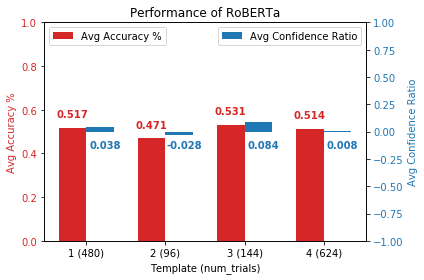

In [89]:
x_labels = ["1 (480)", "2 (96)", "3 (144)", "4 (624)"]
x_label = "Template (num_trials)"
left_units = "Avg Accuracy %"
right_units = "Avg Confidence Ratio"
left_bar_data = [round(template_accuracy[str(i)]["pct"], 3) for i in range(1, 5)]
right_bar_data = [round(template_ratio[str(i)]["pct"], 3) for i in range(1, 5)]
title = "Performance of RoBERTa"
display_two_axis_bar_plot(x_labels, x_label, left_units, right_units, 
                              left_bar_data, right_bar_data, title, False)

In [90]:
perturbation_accuracy = aggregate_pertubations(template_perturb_dict, "accuracy")
perturbation_ratio = aggregate_pertubations(template_perturb_dict, "ratio_score")

In [107]:
linguistic_operations = ["original-original", "negation-original", "antonym-original", "paraphrase-original", 
                         "paraphrase_inversion-original",
                         "negation_antonym-original", "negation_paraphrase-original", 
                         "negation_paraphrase_inversion-original"]

In [108]:
grouped_perturbation_accuracy = {}
for operator in linguistic_operations:
    count = 0
    total = 0
    for key in perturbation_accuracy:
        if key == operator:
            count += perturbation_accuracy[key]["count"]
            total += perturbation_accuracy[key]["total"]
    grouped_perturbation_accuracy[operator] = count / total

In [110]:
grouped_perturbation_accuracy

{'original-original': 0.8666666666666667,
 'negation-original': 0.18333333333333332,
 'antonym-original': 0.23333333333333334,
 'paraphrase-original': 0.8333333333333334,
 'paraphrase_inversion-original': 0.36666666666666664,
 'negation_antonym-original': 0.8666666666666667,
 'negation_paraphrase-original': 0.18333333333333332,
 'negation_paraphrase_inversion-original': 0.8}

In [111]:
grouped_perturbation_ratio = {}
for operator in linguistic_operations:
    count = 0
    total = 0
    for key in perturbation_ratio:
        if key == operator:
            count += perturbation_ratio[key]["count"]
            total += perturbation_ratio[key]["total"]
    grouped_perturbation_ratio[operator] = count / total

In [112]:
grouped_perturbation_ratio

{'original-original': 0.562284873574236,
 'negation-original': -0.48980967802515907,
 'antonym-original': -0.3626662454697352,
 'paraphrase-original': 0.5472128439416807,
 'paraphrase_inversion-original': -0.1729151455731461,
 'negation_antonym-original': 0.6378490052755331,
 'negation_paraphrase-original': -0.43730880923215615,
 'negation_paraphrase_inversion-original': 0.5655991663160488}

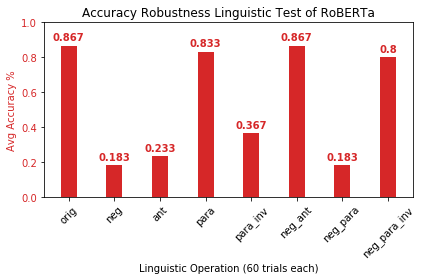

In [147]:
x_labels = ["orig", "neg", "ant", "para", "para_inv", "neg_ant", "neg_para", "neg_para_inv"]
x_label = "Linguistic Operation (60 trials each)"
left_units = "Avg Accuracy %"
left_bar_data = [round(grouped_perturbation_accuracy[key], 3) for key in linguistic_operations]
title = "Accuracy Robustness Linguistic Test of RoBERTa"
display_bar_plot(x_labels, x_label, left_units, left_bar_data, title, False)

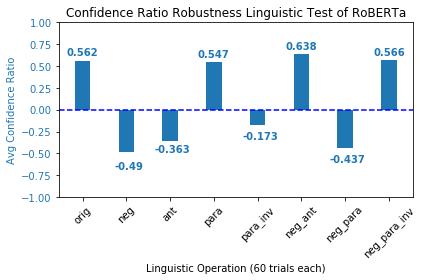

In [177]:
x_labels = ["orig", "neg", "ant", "para", "para_inv", "neg_ant", "neg_para", "neg_para_inv"]
x_label = "Linguistic Operation (60 trials each)"
# left_units = "Avg Accuracy %"
right_units = "Avg Confidence Ratio"
right_bar_data = [round(grouped_perturbation_ratio[key], 3) for key in linguistic_operations]
title = "Confidence Ratio Robustness Linguistic Test of RoBERTa"
display_bar_plot(x_labels, x_label, right_units, right_bar_data, title, True)

In [134]:
logicial_operations = ["original", "asymmetric_premise", "asymmetric_conclusion"]

In [139]:
grouped_logical_accuracy = {}
for operator in logicial_operations:
    count = 0
    total = 0
    for key in perturbation_accuracy:
        if key != "count":
            if key.split("-")[1] == operator:
                count += perturbation_accuracy[key]["count"]
                total += perturbation_accuracy[key]["total"]
    grouped_logical_accuracy[operator] = count / total

In [140]:
grouped_logical_accuracy

{'original': 0.5416666666666666,
 'asymmetric_premise': 0.4875,
 'asymmetric_conclusion': 0.4979166666666667}

In [141]:
grouped_logical_ratio = {}
for operator in logicial_operations:
    count = 0
    total = 0
    for key in perturbation_accuracy:
        if key != "count":
            if key.split("-")[1] == operator:
                count += perturbation_ratio[key]["count"]
                total += perturbation_ratio[key]["total"]
    grouped_logical_ratio[operator] = count / total

In [142]:
grouped_logical_ratio

{'original': 0.10628075135091274,
 'asymmetric_premise': -0.02907792351471062,
 'asymmetric_conclusion': -0.02639553124596814}

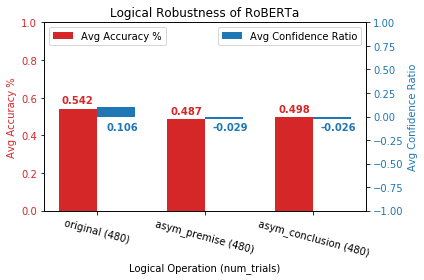

In [168]:
x_labels = ["original (480)", "asym_premise (480)", "asym_conclusion (480)"]
x_label = "Logical Operation (num_trials)"
left_units = "Avg Accuracy %"
right_units = "Avg Confidence Ratio"
left_bar_data = [round(grouped_logical_accuracy[key], 3) for key in grouped_logical_ratio]
right_bar_data = [round(grouped_logical_ratio[key], 3) for key in grouped_logical_ratio]
title = "Logical Robustness of RoBERTa"
display_two_axis_bar_plot(x_labels, x_label, left_units, right_units, 
                              left_bar_data, right_bar_data, title, True)